In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as K
import pandas as pd

# Latex style
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Constants
k_B = K.Boltzmann
e = K.elementary_charge
k_B /= e
n_atoms = 256

# Functions
def read_data(delta_t, its, its_eq, task):
    if task == 2:
        filename = f'data/task_2/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    elif task == 3:
        filename = f'data/task_3/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    elif task == 4:
        filename = f'data/task_4/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'

    data = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',')
    its, t_max, delta_t, its_eq = data[1,0], data[1,1], data[1,2], data[1,3]

    return data[3:, :], int(its), t_max, delta_t, int(its_eq)

def plot_trajs(data, its_eq, its, t_max, delta_t, task):

    def read_trajs():
        if task == 3:
            filename = f'data/task_3/trajs_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
        elif task == 4:
            filename = f'data/task_4/trajs_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
        trajs = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',')

        return trajs[3:, :]

    fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
    t = np.linspace(0, t_max - t_max*its_eq/its, int(its-its_eq))
    trajs = read_trajs()

    axs[0][0].plot(t, trajs[its_eq:, 0], label='$x_1$')
    axs[0][0].plot(t, trajs[its_eq:, 1], label='$y_1$')
    axs[0][0].plot(t, trajs[its_eq:, 2], label='$z_1$')
    axs[0][0].set_title('Atom 1')

    axs[0][1].plot(t, trajs[its_eq:, 3], label='$x_2$')
    axs[0][1].plot(t, trajs[its_eq:, 4], label='$y_2$')
    axs[0][1].plot(t, trajs[its_eq:, 5], label='$z_2$')
    axs[0][1].set_title('Atom 2')

    axs[1][0].plot(t, trajs[its_eq:, 6], label='$x_3$')
    axs[1][0].plot(t, trajs[its_eq:, 7], label='$y_3$')
    axs[1][0].plot(t, trajs[its_eq:, 8], label='$z_3$')
    axs[1][0].set_title('Atom 3')

    axs[1][1].plot(t, trajs[its_eq:, 9], label='$x_4$')
    axs[1][1].plot(t, trajs[its_eq:, 10], label='$y_4$')
    axs[1][1].plot(t, trajs[its_eq:, 11], label='$z_4$')
    axs[1][1].set_title('Atom 4')

    for ax in axs.flatten():
        ax.legend(loc='upper right', ncol=3)
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min, y_max + 0.25 * (y_max - y_min))
    
    axs[0][0].set_ylabel('Position (Å)')
    axs[1][0].set_ylabel('Position (Å)')
    axs[1][0].set_xlabel('Time (ps)')
    axs[1][1].set_xlabel('Time (ps)')

    if task == 3:
        fig.suptitle('\\textbf{{Atom Positions vs. Time | Solid State $\\vert\\approx 500^\\circ$}}\\text{{C}}')
    elif task == 4:
        fig.suptitle('\\textbf{{Atom Positions vs. Time | Liquid State $\\vert\\approx 700^\\circ$}}\\text{{C}}')
    plt.tight_layout()
    plt.show()

def plot_T_E(data, its, t_max, delta_t):
    
    def init_TE_fig():
        fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
        fig.subplots_adjust(hspace=0.05)  # adjust space between Axes
        ax1, ax2, ax3, ax4 = axs[0][0], axs[1][0], axs[0][1], axs[1][1]
        ax3.set_visible(False)
        ax4.set_visible(False)

        ax1_2 = fig.add_subplot(1, 2, 1, frameon=False)
        ax1_2.set_ylabel('Energy [eV]', labelpad=50)
        ax1_2.set_xticks([])
        ax1_2.set_yticks([])

        ax3 = fig.add_subplot(1, 2, 2)
        ax3.set_ylabel('Temperature [K]', labelpad=10)
        plt.suptitle(f'\\textbf{{Energies and Temperature vs. time $\\vert \\hspace{{0.3cm}}\\Delta t = {delta_t}$ ps}}')

        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                    linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_visible(False)

        return fig, ax1, ax2, ax3, ax4

    t = np.linspace(0, t_max, int(its))
    E_k_min, E_k_max = np.min(data[1:, 0]), np.max(data[1:, 0])
    E_p_min, E_p_max = np.min(data[1:, 1]), np.max(data[1:, 1])

    fig, ax1, ax2, ax3, ax4 = init_TE_fig()
    ax1.plot(t, data[:, 0], label='Kinetic Energy')
    ax1.plot(t, data[:, 1], label='Potential Energy')
    ax1.plot(t, data[:, 2], label='Total Energy')
    ax2.plot(t, data[:, 0], label='Kinetic Energy')
    ax2.plot(t, data[:, 1], label='Potential Energy')
    ax2.plot(t, data[:, 2], label='Total Energy')
    ax1.set_ylim(E_k_max - 0.75 * (E_k_max - E_k_min), E_k_max + 0.5 * (E_k_max - E_k_min))
    ax2.set_ylim(E_p_min - 0.1 * (E_p_max - E_p_min), E_p_max + 0.4 * (E_p_max - E_p_min))

    ax3.plot(t, data[:, 3], label='Temperature', color='tab:red')

    for ax in (ax1, ax2, ax3):
        if ax == ax2 or ax == ax3:
            ax.set_xlabel('Time [ps]')
        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis='both', direction='in', length=5, width=1, colors='black')

    ax1.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax1.legend(fontsize=12, loc='upper right')
    ax3.legend(fontsize=12, loc='upper right')
    plt.tight_layout()
    plt.show()

def plot_T_P(data, its_eq):

    def init_TP_fig():
        fig, ax = plt.subplots(2, 1, figsize=(8, 6))
        ax1, ax2 = ax[0], ax[1]
        fig.subplots_adjust(hspace=0.01)
        ax1_2 = fig.add_subplot(1, 2, 1, frameon=False)
        ax1_2.set_ylabel('Temperature [°C]', labelpad=50, color='tab:red')
        ax1_2.set_xticks([])
        ax1_2.set_yticks([])

        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                    linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_visible(False)
        ax3 = ax1.twinx()
        ylabel_twin = ax3.set_ylabel('Pressure [MPa]', labelpad=10, color='tab:blue', loc='bottom')
        ylabel_twin.set_position((ylabel_twin.get_position()[0], ylabel_twin.get_position()[1] - 0.65)) 
        ax4 = ax2.twinx()
        ax3.spines.bottom.set_visible(False)
        ax4.spines.top.set_visible(False)
        ax3.set_xticks([])
        
        for ax in (ax1, ax2):
            ax.yaxis.set_ticks_position('both')
            ax.xaxis.set_ticks_position('both')
            ax.tick_params(axis='y', direction='in', length=5, width=1, colors='tab:red', right=False, pad=10)
        for ax in (ax3, ax4):
            ax.yaxis.set_ticks_position('both')
            ax.xaxis.set_ticks_position('both')
            ax.tick_params(axis='both', direction='in', length=5, width=1, colors='tab:blue', left=False, pad=10)
        ax1.tick_params(axis='x', which='both', direction='in', length=5, width=1, bottom=False, top=True, labelbottom=False)
        ax2.tick_params(axis='x', which='both', direction='in', length=5, width=1, bottom=True, top=False, labelbottom=True)

        return fig, ax1, ax2, ax3, ax4

    T_avg = data[:, 4] - 273.15 # Convert to Celsius
    T_min, T_max = np.min(T_avg), np.max(T_avg)
    P_avg = data[:, 6]
    P_min, P_max = np.min(P_avg), np.max(P_avg)
    t = np.linspace(0, t_max, its)

    fig, ax1, ax2, ax3, ax4 = init_TP_fig()

    ax1.plot(t, T_avg, color='tab:red', label='Temperature')
    ax2.plot(t, T_avg, color='tab:red', label='Temperature')
    ax3.plot(t, P_avg, color='tab:blue', label='Pressure')
    ax4.plot(t, P_avg, color='tab:blue', label='Pressure')

    ax1.set_ylim(T_max - 0.05 * (T_max - T_min), T_max + 0.02 * (T_max - T_min))
    ax2.set_ylim(T_min + 0.01 * (T_max - T_min), T_min + 0.5 * (T_max - T_min))
    ax3.set_ylim(P_max - 0.05 * (P_max - P_min), P_max + 0.02 * (P_max - P_min))
    ax4.set_ylim(P_min - 0.1 * (P_max - P_min), P_min + 0.6 * (P_max - P_min))

    ax2.set_xlabel('Time [ps]')
    ax1.legend(loc='upper left', labelcolor='tab:red')
    ax3.legend(loc='upper right', labelcolor='tab:blue')

    plt.tight_layout()
    plt.show()

def plot_volume_evo(data, its, t_max, delta_t, its_eq):
    volume_unit_cell = np.pow(data[:, 7], 3)

    t = np.linspace(0, t_max, its)
    plt.plot(t,volume_unit_cell)

    plt.vlines(its_eq * delta_t, volume_unit_cell[0],volume_unit_cell[its_eq], color='k', linestyle='--', label='Equilibration Time',alpha=0.5) 
    plt.text((its_eq + 1000) * delta_t, (volume_unit_cell[0] + volume_unit_cell[its_eq])/2, '$t_{eq}$ = 25 ps', ha='left')

    plt.xlabel('Time [ps]')
    plt.ylabel('Unit Cell Volume [Å$^3$]')

    plt.tight_layout()
    plt.show()


### Task 1 - Energy vs. Lattice Volume

The lattice parameter value generating the minimum energy is 4.030 Å


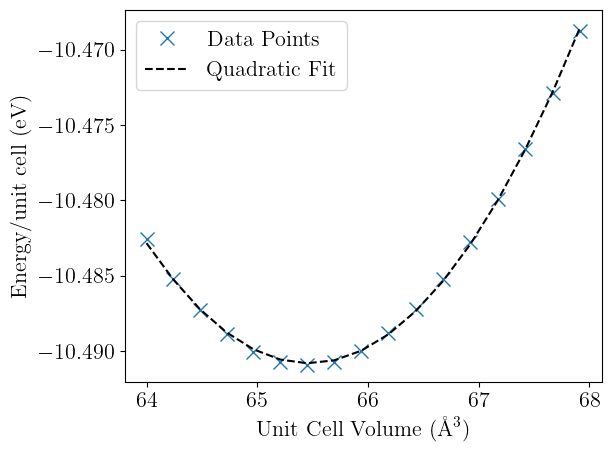

In [2]:

data = np.loadtxt('data/task_1/energies.csv', delimiter=',')
plt.plot(np.power(data[:, 0], 3), data[:, 1] / 64, 'x', ms=10, label='Data Points')

fit = np.polyfit(np.power(data[:, 0], 3), data[:, 1] / 64, 2)
plt.plot(np.power(data[:, 0], 3), np.polyval(fit, np.power(data[:, 0], 3)), 'k--', label='Quadratic Fit')

print(f'The lattice parameter value generating the minimum energy is {np.power(-fit[1] / (2 * fit[0]), 1/3):.3f} Å')

plt.xlabel('Unit Cell Volume (Å$^3$)')
plt.ylabel('Energy/unit cell (eV)')

plt.legend()
plt.tight_layout()
plt.show()

### Task 2 - Energy Conservation and Temperature

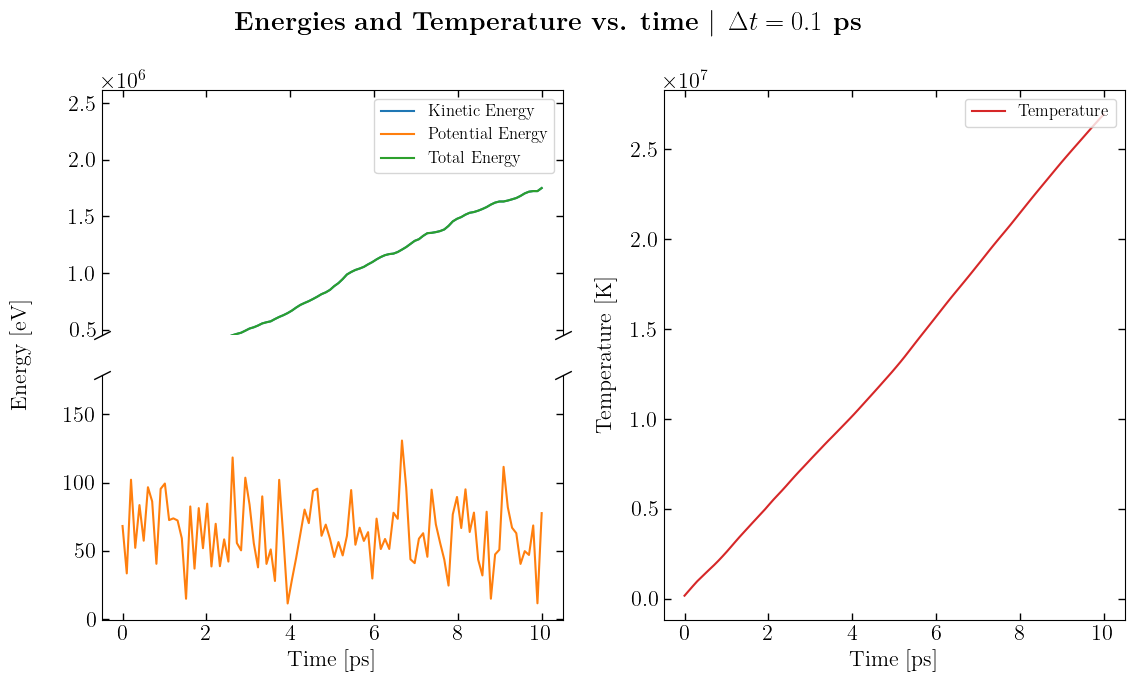

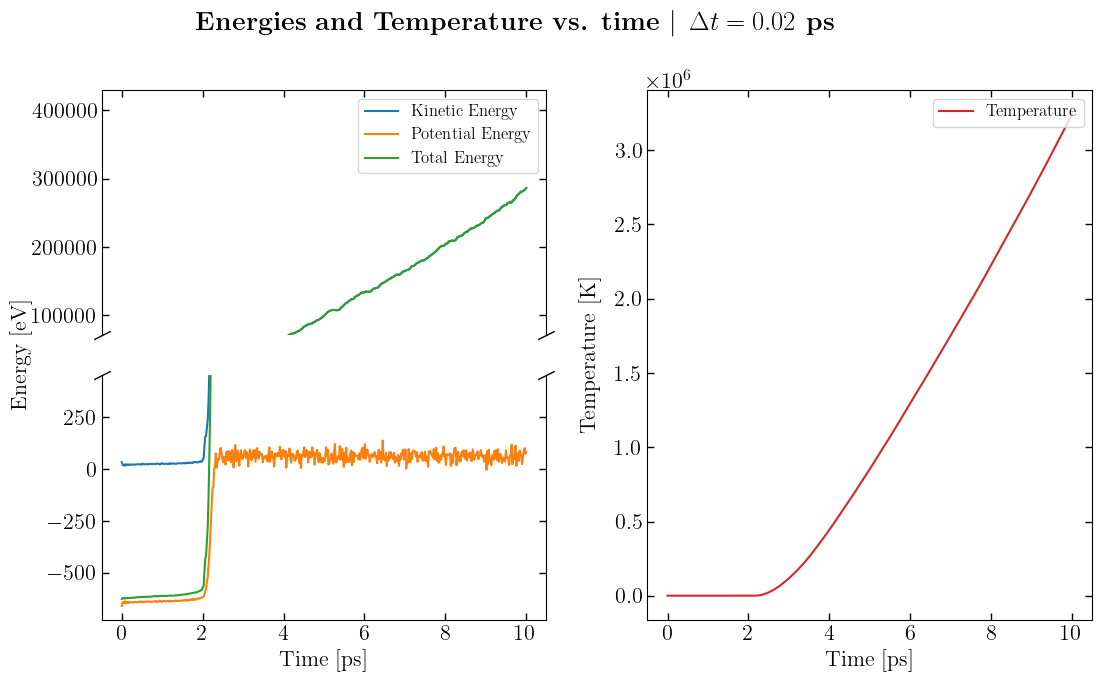

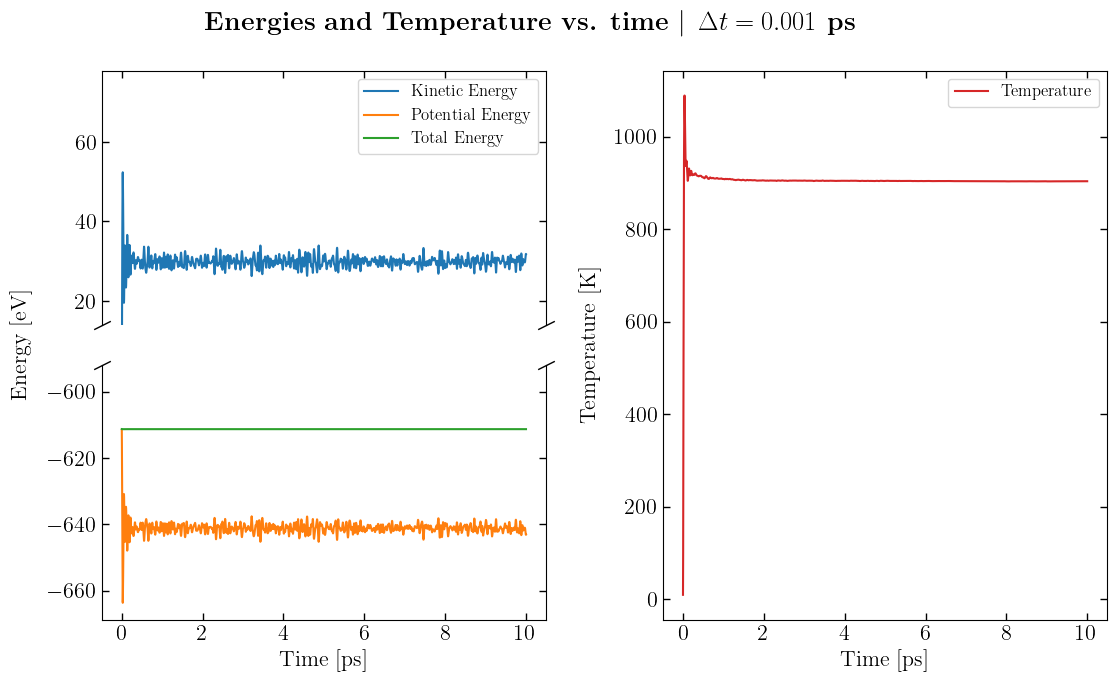

In [5]:
t_max = 10
its_eq = 0
data_01, its_01, t_max_01, delta_t_01, _ = read_data(0.1, t_max/0.1, 0, 2)
data_005, its_005, t_max_005, delta_t_005, _ = read_data(0.02, t_max/0.02, 0, 2)
data_0001, its_0001, t_max_0001, delta_t_0001, _ = read_data(0.001, t_max/0.001, 0, 2)
 
plot_T_E(data_01, its_01, t_max_01, delta_t_01)
plot_T_E(data_005, its_005, t_max_005, delta_t_005)
plot_T_E(data_0001, its_0001, t_max_0001, delta_t_0001)

### Task 3 - Characteristics of the Solid System

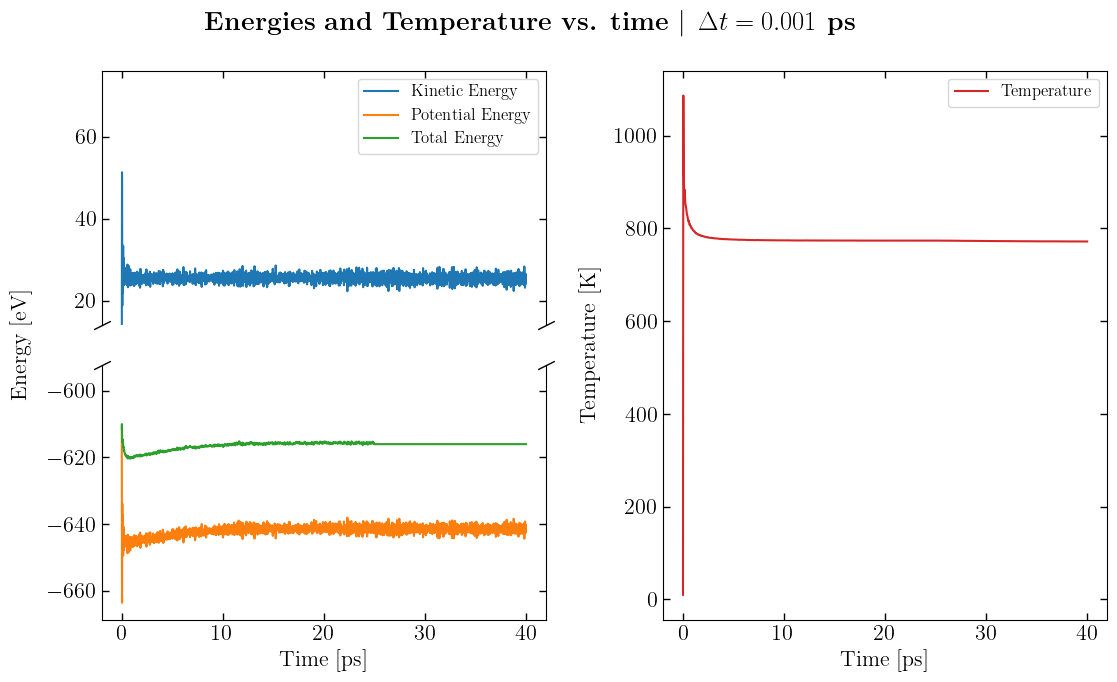

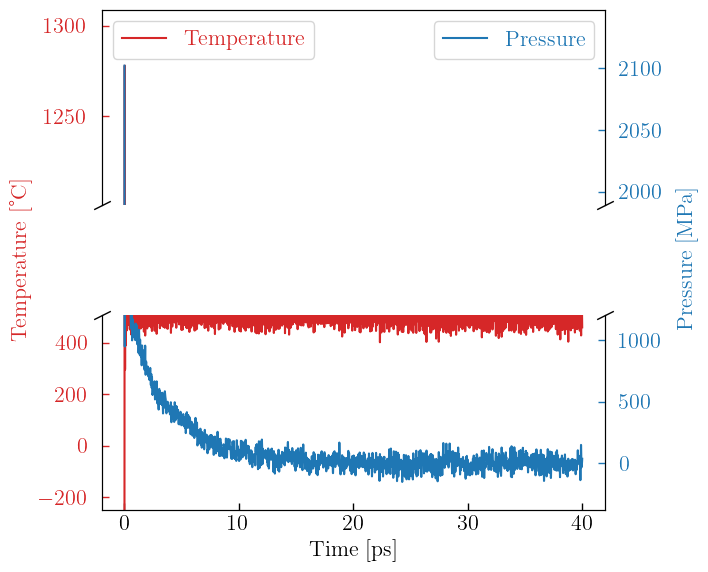

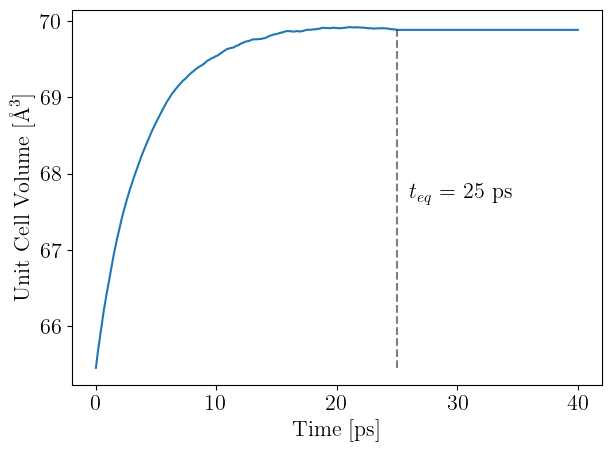

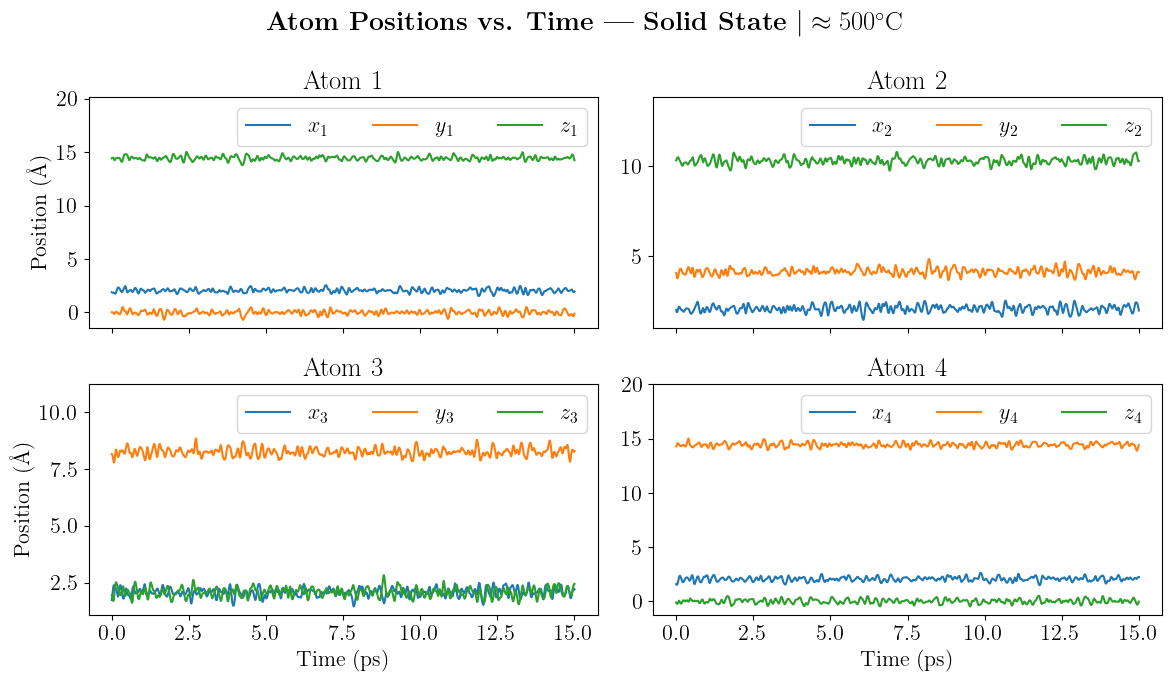

In [6]:
data, its, t_max, delta_t, its_eq,  = read_data(0.001, 40000, 25000, task=3)
# Col 1 = Kinetic Energy, Col 2 = Potential Energy, Col 3 = Total Energy, 
# Col 4 = Temperature AVG, Col 5 = Instantaneous Temperature, Col 6 = Pressure AVG,
# Col 7 = Instantaneous Pressure, Col 8 = Lattice Parameter

plot_T_E(data, its, t_max, delta_t)
plot_T_P(data, its_eq)
plot_volume_evo(data, its, t_max, delta_t, its_eq)
plot_trajs(data, its_eq, its, t_max, delta_t, task=3)


### Task 4 - Trajectories for the Melted System

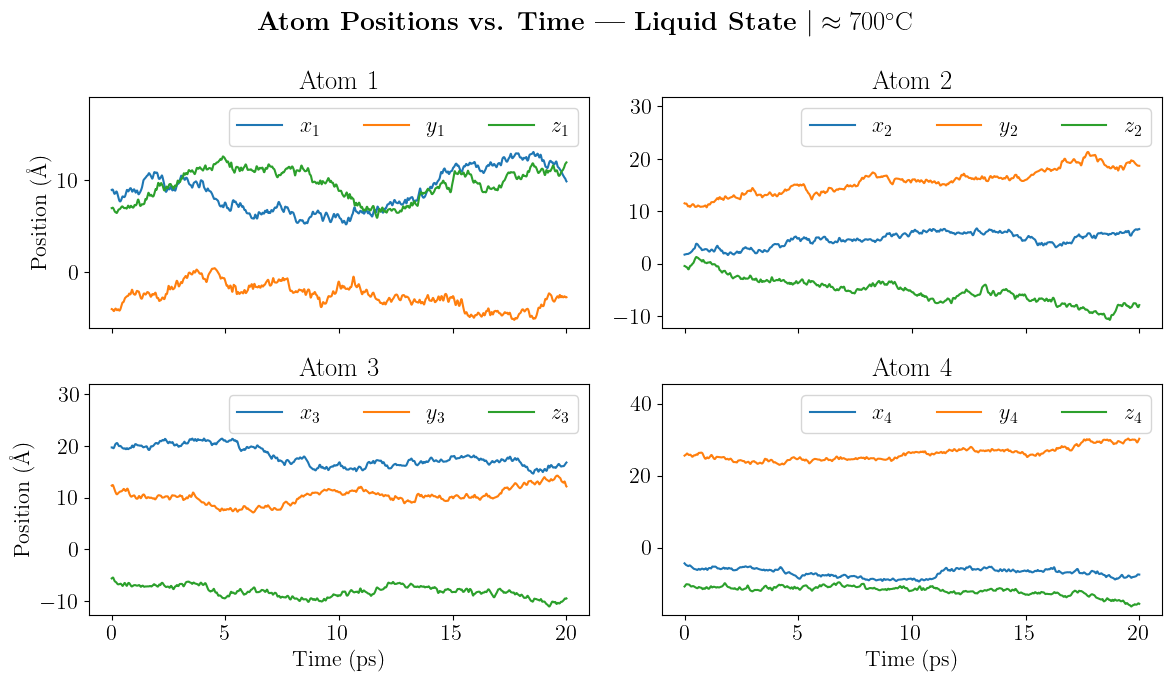

In [8]:
its_eq = 30000
its = 50000
t_max = 50
delta_t = 0.001
task = 4

plot_trajs(data, its_eq, its, t_max, delta_t, task)

### Task 5 - Determination of the Heat Capacity $C_V$

In [ ]:
def avg_fluct_square(data):
    data_avg = np.mean(data)
    d_data = np.mean((data - data_avg)**2)

    return d_data

def calc_CV(data, its_eq, n_atoms, k_B, e):
    T_avg = np.mean(data[its_eq:, 4])
    dE_kin = avg_fluct_square(data[its_eq:, 0])
    dE_pot = avg_fluct_square(data[its_eq:, 1])

    Cv_kin = (3 * n_atoms * k_B / 2) / (1  - 2 / (3 * n_atoms * k_B**2 * T_avg**2) * dE_kin) * e
    Cv_pot = (3 * n_atoms * k_B / 2) / (1  - 2 / (3 * n_atoms * k_B**2 * T_avg**2) * dE_pot) * e

    return Cv_kin, Cv_pot, T_avg, dE_kin, dE_pot

data_3 = read_data(0.001, 40000, 25000, task=3)
data_4 = read_data(0.001, 50000, 30000, task=4)

Cv_kin_3, Cv_pot_3, T_avg_3, dE_kin_3, dE_pot_3 = calc_CV(data_3[0], data_3[4], n_atoms, k_B, e)
Cv_kin_4, Cv_pot_4, T_avg_4, dE_kin_4, dE_pot_4 = calc_CV(data_4[0], data_4[4], n_atoms, k_B, e)

results = pd.DataFrame({'Cv_kin': [Cv_kin_3, Cv_kin_4], 
                       'Cv_pot': [Cv_pot_3, Cv_pot_4], 
                       'dE_kin': [dE_kin_3, dE_kin_4],
                       'dE_pot': [dE_pot_3, dE_pot_4],
                       'T_avg': [T_avg_3, T_avg_4]}, 
                       index=['Solid', 'Liquid'], )
results = result.style.format({"Cv_kin": "{:.3e}",
                              "Cv_pot": "{:.3e}",
                              "dE_kin": "{:.3f}",
                              "dE_pot": "{:.3f}",
                              "T_avg": "{:.3f}"})
display(results)


,Cv_kin,Cv_pot,dE_kin,dE_pot,T_avg
Solid,1.187e-20,1.188e-20,0.932,0.933,768.441
Liquid,9.792e-21,9.797e-21,1.237,1.237,972.489


## Task 6 - Determination of the radial distribution function and coordination number

Radial distribution function: $$g(\bm{r}) = \frac{N}{V^2} \left\langle\sum_{i=1}^N \sum_{i\neq j}^N \delta(\bm{r} - (\Delta\bm{r}_{ij}))\right\rangle,\,\Delta\bm{r}_{ij} = \bm{r}_i  - \bm{r}_j$$


Coordination number: $$I_m = n \int_0^{r_m}g(r)4\pi dr$$
 **What is $N$ and $n$? number of atoms and number of iterations?**

In [ ]:
def dirac_delta(x1, x2, epsilon = 1e-6):
    diff = x1 - x2
    if np.abs(diff) < epsilon:
        delta = 1
    else:
        delta = 0
    return delta

def radial_dist(data,dr, n_atoms = n_atoms,V = volume_unit_cell):
    rk = (k - 1/2) * dr
    n = len(data) 
    g_k = np.zeros(n)
    for k in range(n):
    
    N_ideal = (n_atoms-1) / volume_unit_cell[-1] * 4 * np.pi * (k**2 - k + 1/3 ) * dr**3



